In [116]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database='attendance'
)
mycursor = mydb.cursor()
mycursor.execute("SELECT `date`,`student_rollno`,`student_name`,`student_enroll`,`session`,`present`,`div` FROM `final_att` where 1 ")
df = mycursor.fetchall()
# for data in df :
    # print(data)
    # print(df)    

df = pd.DataFrame(df , columns=["date" , "student_rollno" , "student_name" ,"student_enroll" , "session" , "present","div" ])
#print(df.groupby("div")['present'].size())


In [27]:
df.groupby(['date','div' , "student_enroll" , "student_rollno" , 'student_name'])['present'].size()

date        div   student_enroll  student_rollno  student_name
18/03/2023  ce_c  21SOECE11101    2               smit            4
                  21SOECE11108    5               ajay            5
                  21SOECE11109    8               shruti          6
                  21SOECE11125    19              priya           6
                  21SOECE11130    24              bandhan         3
19/03/2023  ce_c  21SOECE11101    2               smit            2
                  21SOECE11108    5               ajay            1
                  21SOECE11109    8               shruti          1
                  21SOECE11125    19              priya           1
                  21SOECE11130    24              bandhan         1
Name: present, dtype: int64

In [25]:
df.groupby(['student_enroll' , 'student_rollno' , 'student_name' , "date" , "session"])['present'].size()

student_enroll  student_rollno  student_name  date        session
21SOECE11101    2               smit          18/03/2023  1          1
                                                          2          1
                                                          3          1
                                                          4          1
                                              19/03/2023  1          1
                                                          2          1
21SOECE11108    5               ajay          18/03/2023  1          1
                                                          2          1
                                                          3          1
                                                          4          1
                                                          6          1
                                              19/03/2023  2          1
21SOECE11109    8               shruti        18/03/2023  1          1
           

In [135]:
# if search by student enroll :
student = "21SOECE11125"
x = df.groupby(["student_enroll",'date', "student_name"])['present'].sum().reset_index()

x = x[x.student_enroll == student]#.sort_values(by="present")
#x.sort_values(by="present")
x

,student_enroll,date,student_name,present
0,21SOECE11101,18/03/2023,smit,4
1,21SOECE11101,19/03/2023,smit,2
2,21SOECE11108,18/03/2023,ajay,5
3,21SOECE11108,19/03/2023,ajay,1
4,21SOECE11109,18/03/2023,shruti,6
5,21SOECE11109,19/03/2023,shruti,1
6,21SOECE11125,18/03/2023,priya,6
7,21SOECE11125,19/03/2023,priya,1
8,21SOECE11130,18/03/2023,bandhan,3
9,21SOECE11130,19/03/2023,bandhan,1


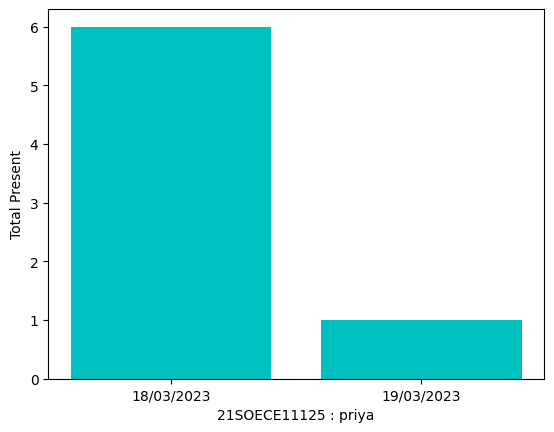

In [134]:
plt.bar(x.date , x.present ,color="c" )
plt.ylabel("Total Present")
plt.xlabel(f"{student} : {x.student_name.unique()[0]}")

plt.show()